In [27]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import ndimage
from skimage import io
from scipy import ndimage


In [9]:
# function for displaying image
def display(img):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

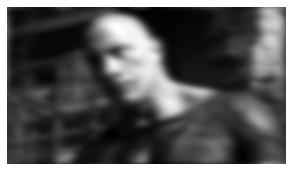

In [13]:
def GaussianLowFilter(img):
    
    # transform the image into frequency domain, f --> F
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)
    
    # Create Gaussin Filter: Low Pass Filter
    M,N = img.shape
    H = np.zeros((M,N), dtype=np.float32)
    D0 = 10
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = np.exp(-D**2/(2*D0*D0))
            
    # Image Filters
    Gshift = Fshift * H
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))
    return g

    
img= cv2.imread('the rock.jpg',0)
g= GaussianLowFilter(img)
display(g)

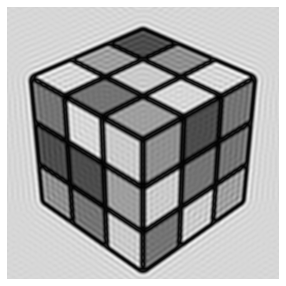

In [18]:
def idealLowPass(img):
        # image in frequency domain
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)

    # Filter: Low pass filter
    M,N = img.shape
    H = np.zeros((M,N), dtype=np.float32)
    D0 = 50
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            if D <= D0:
                H[u,v] = 1
            else:
                H[u,v] = 0

    # Ideal Low Pass Filtering
    Gshift = Fshift * H

    # Inverse Fourier Transform
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))
    return g

img= cv2.imread('image.png',0)
g= idealLowPass(img)
display(g)

    

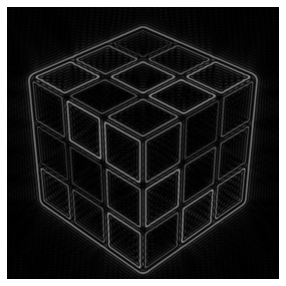

In [19]:
def IdealHighPass(img):
    # image in frequency domain
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)

    # Filter: Low pass filter
    M,N = img.shape
    H = np.zeros((M,N), dtype=np.float32)
    D0 = 50
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            if D <= D0:
                H[u,v] = 1
            else:
                H[u,v] = 0             
    # Filter: High pass filter
    H = 1 - H
    # Ideal High Pass Filtering
    Gshift = Fshift * H
    # Inverse Fourier Transform
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))
    return g

img= cv2.imread('image.png',0)
g= IdealHighPass(img)
display(g)


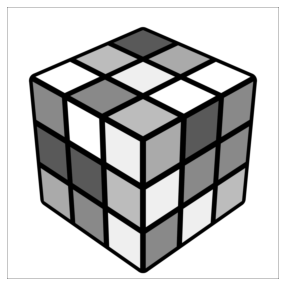

In [23]:
def meanLowPass(img):
    # Obtain number of rows and columns 
    # of the image
    m, n = img.shape

    # Develop Averaging filter(3, 3) mask
    mask = np.ones([3, 3], dtype = int)
    mask = mask / 9

    # Convolve the 3X3 mask over the image 
    img_new = np.zeros([m, n])

    for i in range(1, m-1):
        for j in range(1, n-1):
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]

            img_new[i, j]= temp

    img_new = img_new.astype(np.uint8)
    return img_new

img= cv2.imread('image.png',0)
g= meanLowPass(img)
display(g)




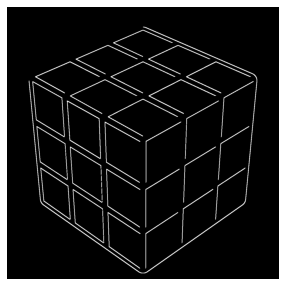

In [25]:
def sobel(img):
    # sobel kernel
    sobel_x = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

    sobel_y = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    # partial derivative in x-direction
    edge_x = cv2.filter2D(src=img, ddepth=-1, kernel=sobel_x)
    edge_x[edge_x != 0] = 255


    # partial derivative in y-direction
    edge_y = cv2.filter2D(src=img, ddepth=-1, kernel=sobel_y)
    edge_y[edge_y != 0] = 255


    # combinte the x and y edge
    add_edge = edge_x + edge_y
    add_edge[add_edge != 0] = 255
    return add_edge

img= cv2.imread('image.png',0)
g= sobel(img)
display(g)


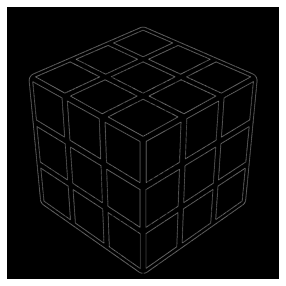

In [30]:
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

def robert(img):
    roberts_cross_v = np.array( [[ 0, 0, 0 ],
                             [ 0, 1, 0 ],
                             [ 0, 0,-1 ]] )

    roberts_cross_h = np.array( [[ 0, 0, 0 ],
                             [ 0, 0, 1 ],
                             [ 0,-1, 0 ]] )
    vertical = ndimage.convolve( img, roberts_cross_v )
    horizontal = ndimage.convolve( img, roberts_cross_h )
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    return edged_img

img= cv2.imread('image.png',0)
g= robert(img)
display(g)

    

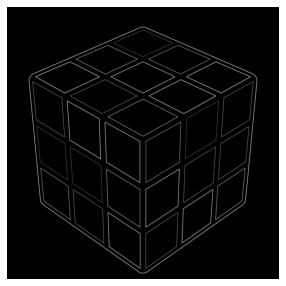

In [31]:
def prewit(img):
    #define horizontal and Vertical sobel kernels
    Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
    Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
    #normalizing the vectors
    pre_x = convolve(img, Hx) / 6.0
    pre_y = convolve(img, Hy) / 6.0
    #calculate the gradient magnitude of vectors
    pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
    # mapping values from 0 to 255
    pre_out = (pre_out / np.max(pre_out)) * 255
    return pre_out

img= cv2.imread('image.png',0)
g= prewit(img)
display(g)
